In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model,

In [3]:
mpg = pd.read_csv('autompg.csv')

In [4]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
car = pd.DataFrame(mpg,columns=['acceleration','mpg'])

In [7]:
car.head()

,acceleration,mpg
0,12.0,18.0
1,11.5,15.0
2,11.0,18.0
3,12.0,16.0
4,10.5,17.0


Attribute Information:

mpg: continuous
cylinders: multi-valued discrete
displacement: continuous
horsepower: continuous
weight: continuous
acceleration: continuous
model year: multi-valued discrete
origin: multi-valued discrete
car name: string (unique for each instance)
Missing Attribute Values: horsepower has 6 missing values

In [51]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   acceleration  398 non-null    float64
 1   mpg           398 non-null    float64
dtypes: float64(2)
memory usage: 6.3 KB


# Standardizing the values using zscore

In [9]:
from scipy.stats import zscore

In [10]:
cars = car.apply(zscore)

In [52]:
cars.head()

,acceleration,mpg
0,-1.295498,-0.706439
1,-1.477038,-1.090751
2,-1.658577,-0.706439
3,-1.295498,-0.962647
4,-1.840117,-0.834543


# Shaping the attributes and labels

In [12]:
x = np.array(cars['acceleration'])

In [13]:
x.shape

(398,)

In [14]:
x = x.reshape(len(x),1)

In [15]:
x.shape

(398, 1)

In [16]:
y = np.array(cars['mpg'])

In [17]:
y.shape

(398,)

In [18]:
y = y.reshape(len(y),1)
y.shape

(398, 1)

# Spliting data into train and test

In [34]:
from sklearn import model_selection

In [35]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size = 0.20)

# Applying Linear Regression and training the datasets

In [28]:
lr = linear_model.LinearRegression()

In [36]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Coeff and Intercept

In [32]:
lr.coef_

array([[0.4513943]])

In [33]:
lr.intercept_

array([0.01587034])

# Predicting using test data

In [37]:
y_pred = lr.predict(x_test)

In [38]:
x_test[5]

array([0.59251192])

In [40]:
y_test[5]

array([-0.52709314])

In [43]:
y_pred[5]

array([0.21690313])

# Accuracy check using R square 

In [42]:
lr.score(x_test,y_test)

0.21950396220079238

In [44]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Best Fit Line')

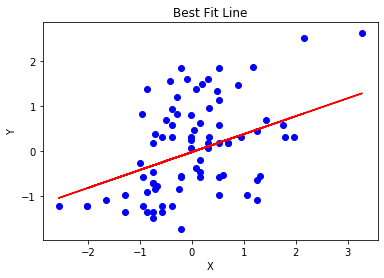

In [50]:
plt.scatter(x_test,y_test,color='b')
plt.plot(x_test,y_pred,color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Best Fit Line')